In [1]:
# Import commonly used libraries
import pandas
import numpy
import scipy.stats
from ggplot import *
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create a DataFrame to store the turnstile and weather data.
allData = pandas.read_csv ("turnstile_data_master_with_weather.csv")

In [3]:
# Setup our features (what we use to predict) and 
# value (what we're trying to predict)
# Run OLS to create and evaluate the model
values = allData['ENTRIESn_hourly']
dummies = pandas.get_dummies(allData['UNIT'], prefix='UNIX')
features = allData[['rain','Hour','fog','mintempi']].join(dummies)
model = sm.OLS(values,features)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     238.0
Date:                Sun, 03 May 2015   Prob (F-statistic):               0.00
Time:                        18:14:20   Log-Likelihood:            -1.1702e+06
No. Observations:              131951   AIC:                         2.341e+06
Df Residuals:                  131482   BIC:                         2.346e+06
Df Model:                         468                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
rain         -26.9686     11.298     -2.387      0.017       -49.112    -4.825
Hour          67.3968      0.691     97.582      0.000        66.043    68.750
fog          117.2483     14.493      8.090      0.000        88.843   145.654
mintempi     -11.3658      0.764    -14.872      0.000       -12.864    -9.868
UNIX_R001   3910.3146    133.619     29.265      0.000      3648.424  4172.205
UNIX_R002    847.3040    134.615      6.294      0.000       583.462  1111.146
UNIX_R003    148.7739    138.318      1.076      0.282      -122.328   419.876
UNIX_R004    475.2001    136.959      3.470      0.001       206.763   743.637
UNIX_R005    462.3419    137.334      3.367      0.001       193.170   731.514
UNIX_R006    535.0744    132.392      4.042      0.000       275.588   794.561
UNIX_R007    312.6090    139.127      2.247      0.025        39.922   585.296
UNIX_R008    346.7553    141.414      2.452      0.014        69.587   623.924
UNIX_R009    275.5365    138.423      1.991      0.047         4.229   546.844
UNIX_R010   4510.7973    134.980     33.418      0.000      4246.240  4775.355
UNIX_R011   7993.7802    130.208     61.392      0.000      7738.574  8248.986
UNIX_R012   7431.2208    126.753     58.627      0.000      7182.786  7679.655
UNIX_R013   2446.3904    131.746     18.569      0.000      2188.171  2704.610
UNIX_R014   3967.5672    132.367     29.974      0.000      3708.130  4227.004
UNIX_R015   2105.6208    121.889     17.275      0.000      1866.720  2344.521
UNIX_R016    914.9509    132.949      6.882      0.000       654.373  1175.529
UNIX_R017   4189.8343    132.627     31.591      0.000      3929.888  4449.781
UNIX_R018   5894.4736    121.374     48.564      0.000      5656.582  6132.365
UNIX_R019   2859.4787    129.391     22.099      0.000      2605.874  3113.083
UNIX_R020   6464.1897    127.421     50.731      0.000      6214.448  6713.932
UNIX_R021   4427.4463    127.627     34.690      0.000      4177.299  4677.593
UNIX_R022   8589.0774    127.196     67.526      0.000      8339.775  8838.380
UNIX_R023   6509.3842    131.115     49.646      0.000      6252.401  6766.368
UNIX_R024   2988.1313    132.659     22.525      0.000      2728.123  3248.140
UNIX_R025   4991.7822    127.877     39.036      0.000      4741.146  5242.418
UNIX_R027   2911.1584    130.501     22.308      0.000      2655.379  3166.937
UNIX_R028   2246.5314    128.595     17.470      0.000      1994.487  2498.575
UNIX_R029   6542.7938    130.498     50.137      0.000      6287.019  6798.568
UNIX_R030   2783.5270    130.178     21.383      0.000      2528.381  3038.673
UNIX_R031   4485.6484    131.087     34.219      0.000      4228.721  4742.576
UNIX_R032   4097.6167    131.988     31.045      0.000      3838.922  4356.312
UNIX_R033   8417.1327    128.966     65.266      0.000      8164.362  8669.903
UN

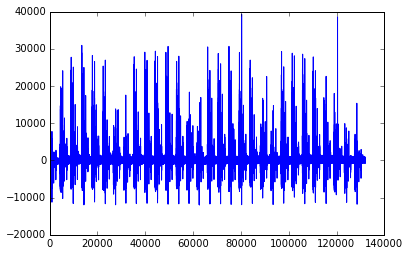

In [4]:
plt.plot(values - results.predict())
plt.show()